<a href="https://colab.research.google.com/github/gol-d-inesh/Ross_man/blob/main/Retail_Sales_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name -** **Retail Sales Prediction**

Project type - EDA Regression

Contribution - Individual

Team member - Dinesh

# Problem Description

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.



You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# GitHub Link -

# Data Description

## Rossmann Stores Data.csv - historical data including Sales#
## store.csv - supplemental information about the stores

# Data fields

## Most of the fields are self-explanatory. The following are descriptions for those that aren't.
Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# Loading Libraries & Data

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
store_df= pd.read_csv("/content/drive/MyDrive/store.csv")

In [ ]:
rossman_df=pd.read_csv("/content/drive/MyDrive/Rossmann Stores Data (1).csv")

<ipython-input-5-9ae3c29e569f>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  rossman_df=pd.read_csv("/content/drive/MyDrive/Rossmann Stores Data (1).csv")


# Analysing the Rossman Dataset

In [ ]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


# Checking Information about Dataset

In [ ]:
rossman_df.shape

(1017209, 9)

In [ ]:
#Checking info of data as data types and rows and cols
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#Checking info of data as data types and rows and cols
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#Checking Null Values
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

# Summary Statastics Of Dataset

In [ ]:
#Summary Statastics
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#No. Of Stores in the Dataset
rossman_df.Store.nunique()

1115

In [ ]:
# Value_counts of StateHoliday Column
rossman_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


# This tells us we have a data of almost 3 years.

In [ ]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)

In [ ]:
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31


# EDA On Rossman Dataset

Heatmap of the Rossman Dataset

<ipython-input-19-8728f8903ebb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_map = rossman_df[rossman_df.columns].corr()


<Axes: >

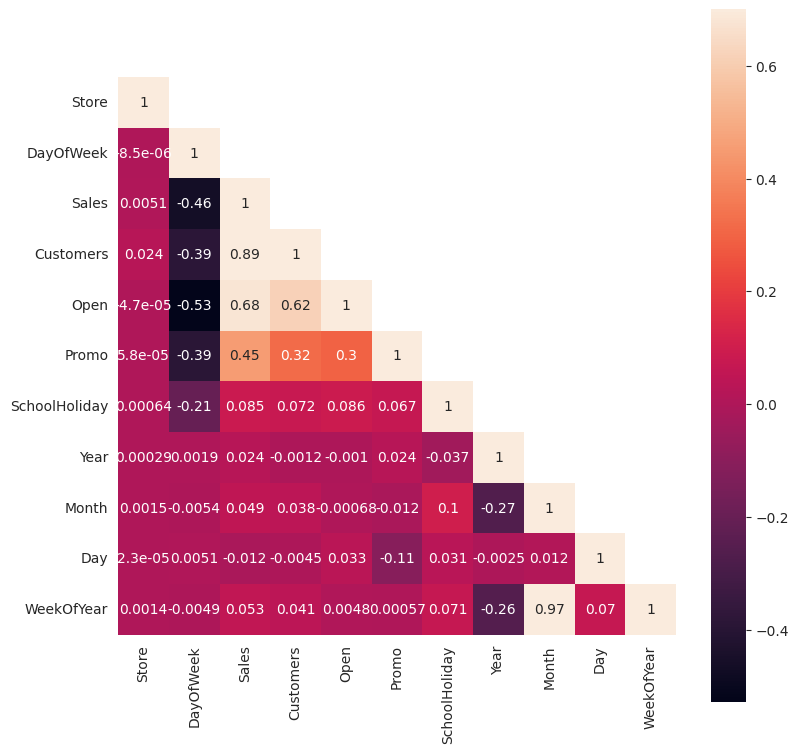

In [ ]:
correlation_map = rossman_df[rossman_df.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

## **As we can see that in the graph given below that Stores mainly closed on Sunday**

<Axes: xlabel='DayOfWeek', ylabel='count'>

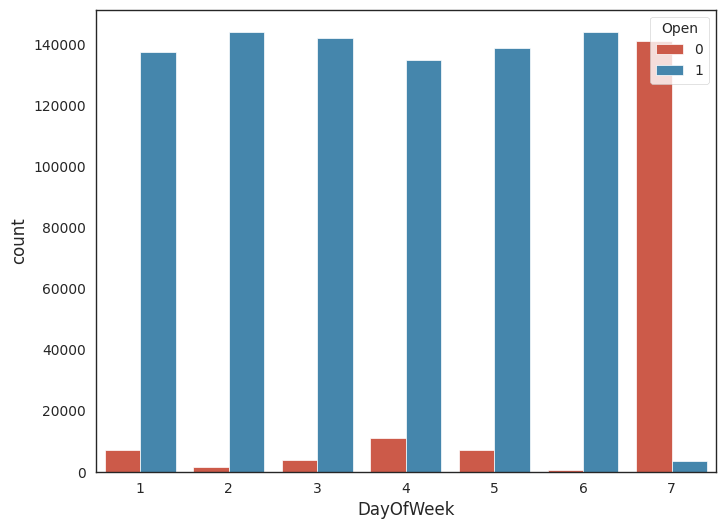

In [ ]:
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df)

Sales Are nearly doubled High When Promo is Running

<Axes: xlabel='Promo', ylabel='Sales'>

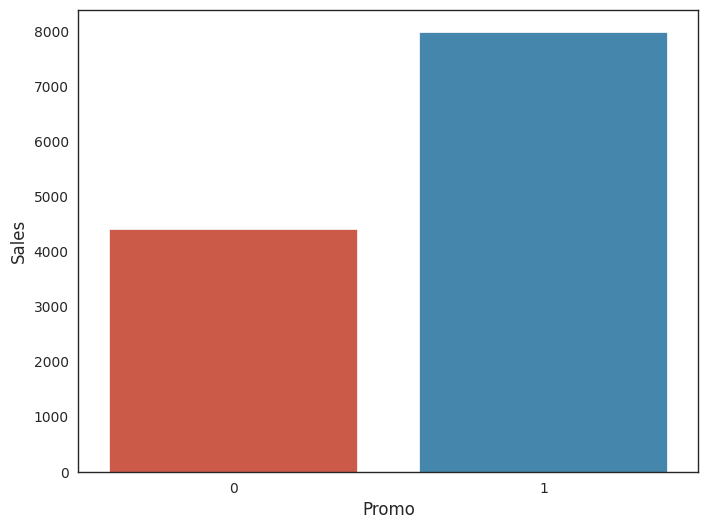

In [ ]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'])

In [ ]:
# Value Counts of SchoolHoliday Column
rossman_df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday

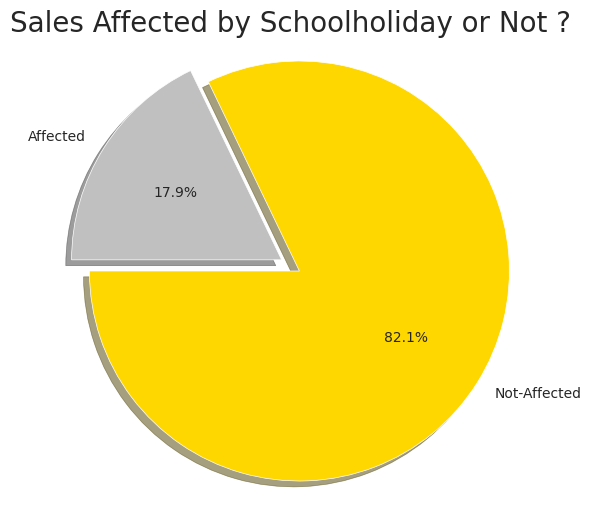

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

# Transforming Variable StateHoliday

In [ ]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [ ]:
rossman_df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday

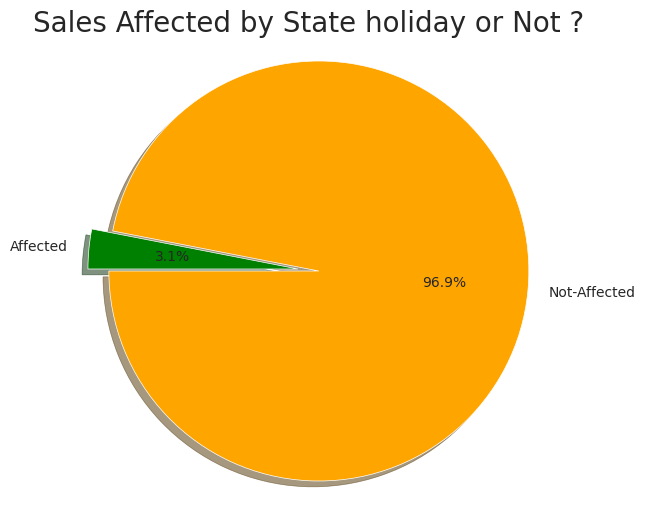

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['orange','green']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

As Sales isn't much affected by State Holiday so i'm removing this column

In [ ]:
rossman_df.drop('StateHoliday',inplace=True,axis=1)

Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.

<ipython-input-28-a68df702e223>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rossman_df['Sales'], kde = False,bins=40);


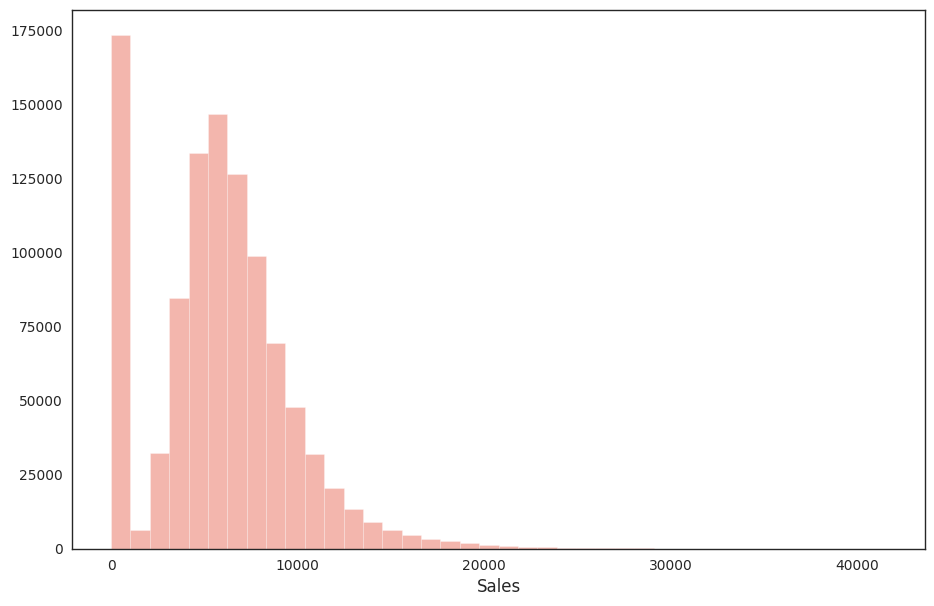

In [ ]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.distplot(rossman_df['Sales'], kde = False,bins=40);

Sales vs Customers

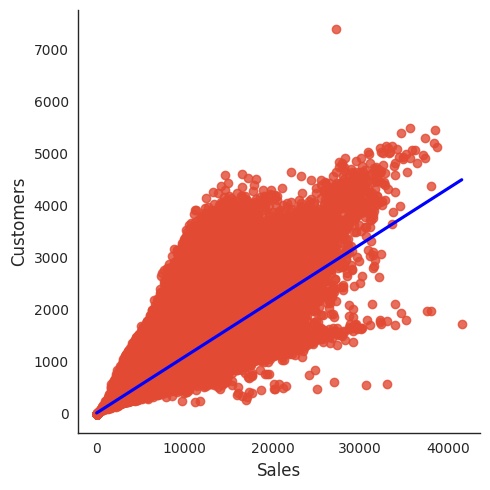

In [ ]:
#linear relation between sales and customers
sns.lmplot(x= 'Sales' , y ='Customers',data=rossman_df, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});

# Analysing the Store Dataset

In [ ]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


Checking Information about Dataset

In [ ]:
store_df.shape

(1115, 10)

In [ ]:
#Checking info of data as data types and rows and cols
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#Checking Null Values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Heatmap for null values

<Axes: >

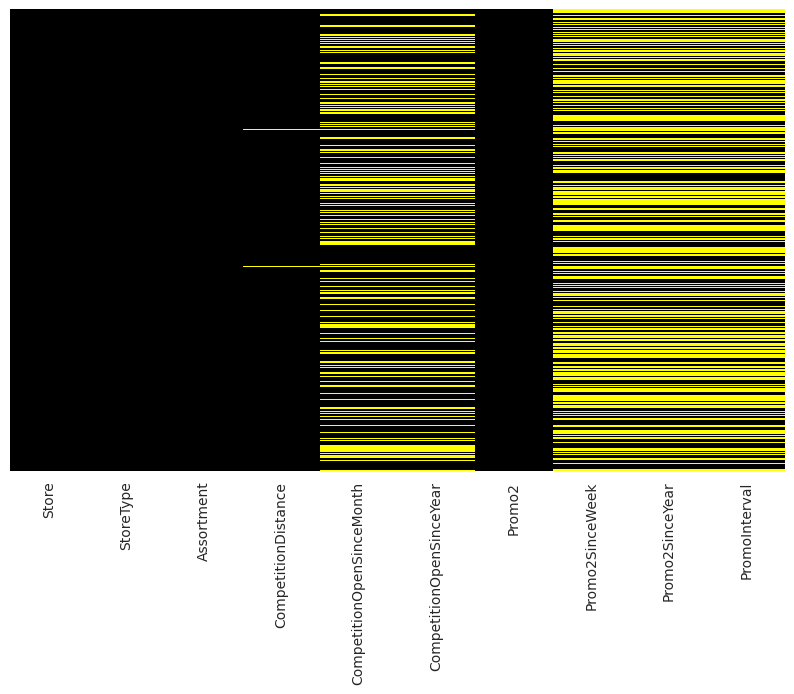

In [ ]:
# creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(),yticklabels= False, cbar= False, cmap= 'gnuplot')

Distribution Of Different Store Types

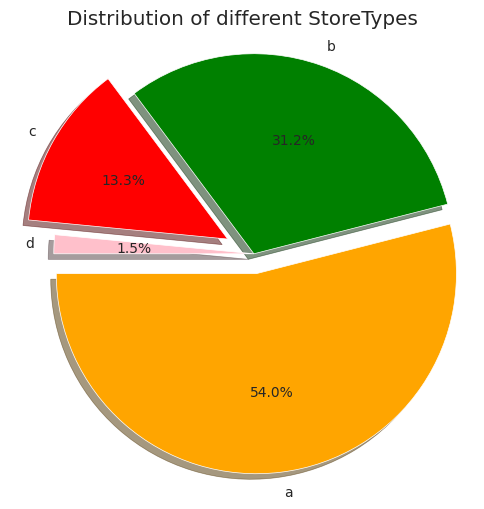

In [ ]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

# Remove features with high percentages of missing values

we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.

In [ ]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

# Replace missing values in features with low percentages of missing values

<ipython-input-38-a8e30cb2c49f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(store_df.CompetitionDistance.dropna())


Text(0.5, 1.0, 'Distributin of Store Competition Distance')

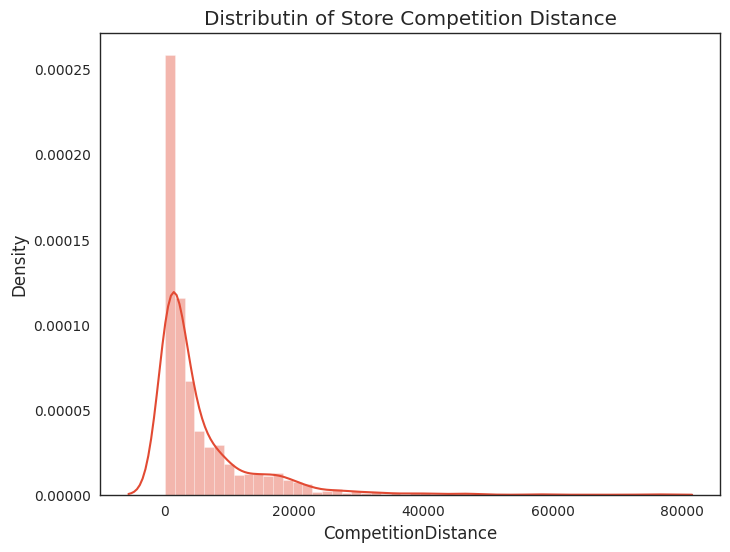

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.distplot(store_df.CompetitionDistance.dropna())
plt.title("Distributin of Store Competition Distance")

The distribution is right skewed, so we'll replace missing values with the median

In [ ]:
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

Pairplot for Store Dataset

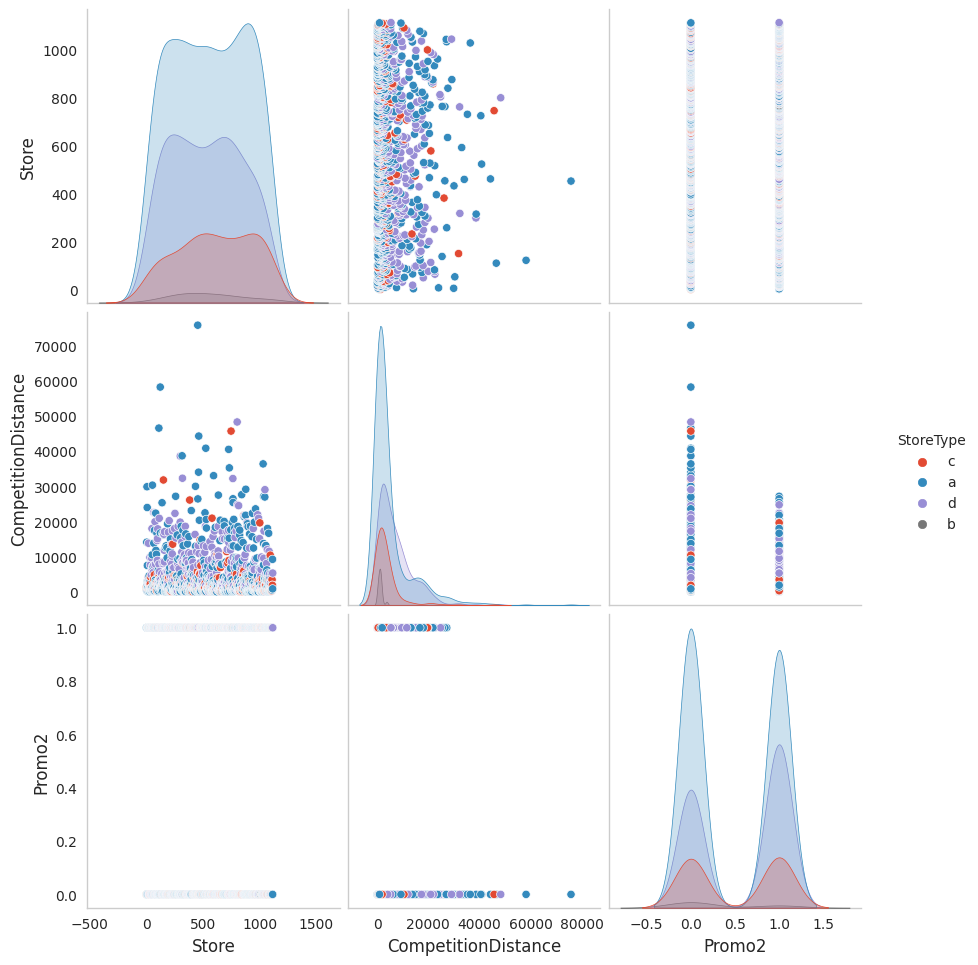

In [ ]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

Checking stores with their assortment type

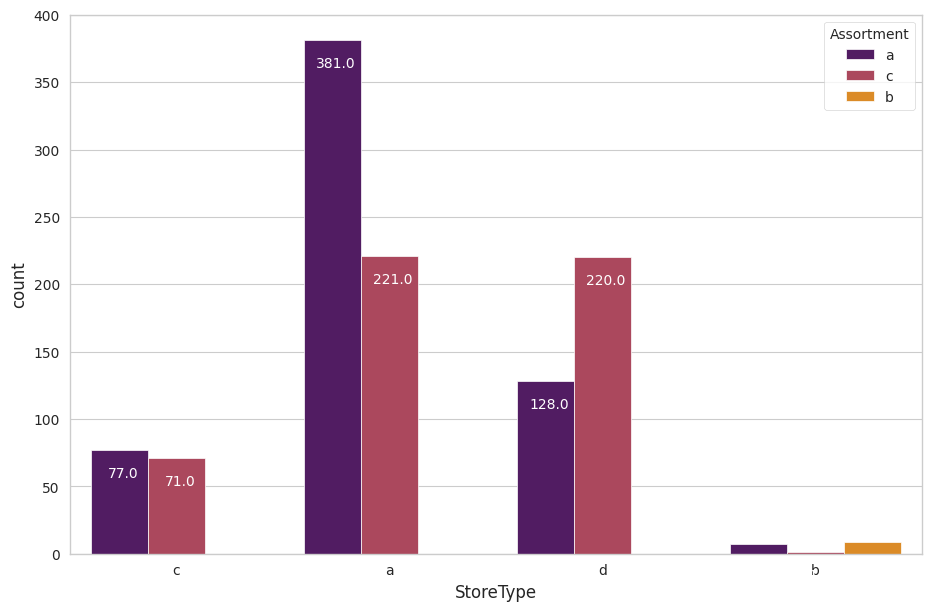

In [ ]:
#checking stores with their assortment type
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

 **We can see that there is not such significant differences in these 3 years in terms of sales.**

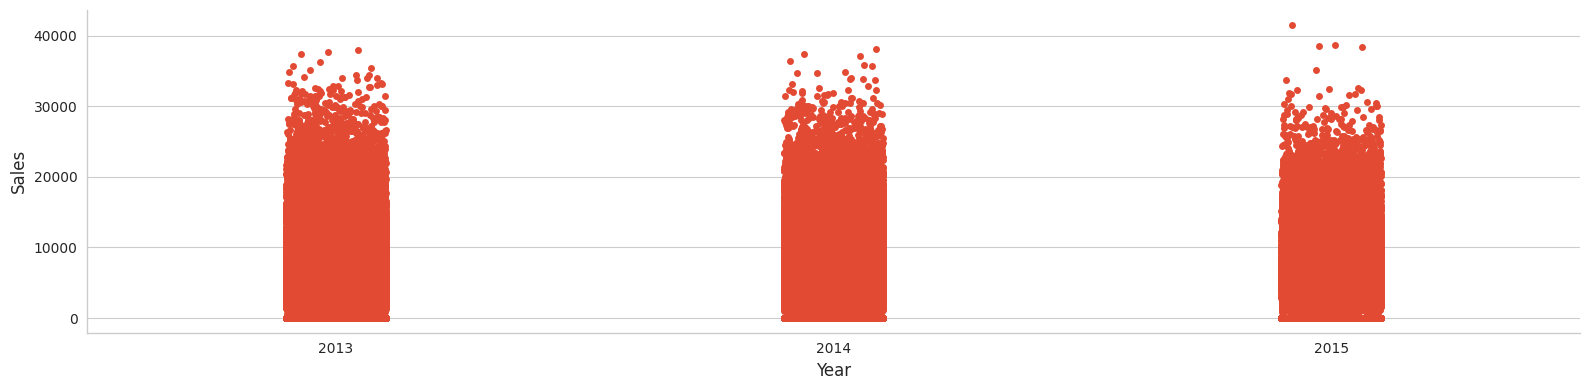

In [ ]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=rossman_df, height=4, aspect=4 );

# Merging Two Datasets

In [ ]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,0


In [ ]:
df.shape

(1017209, 16)

# EDA On Merged Dataset

Heatmap Of Merged Dataset

<ipython-input-45-33de7a8d91ad>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr().abs(), annot=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

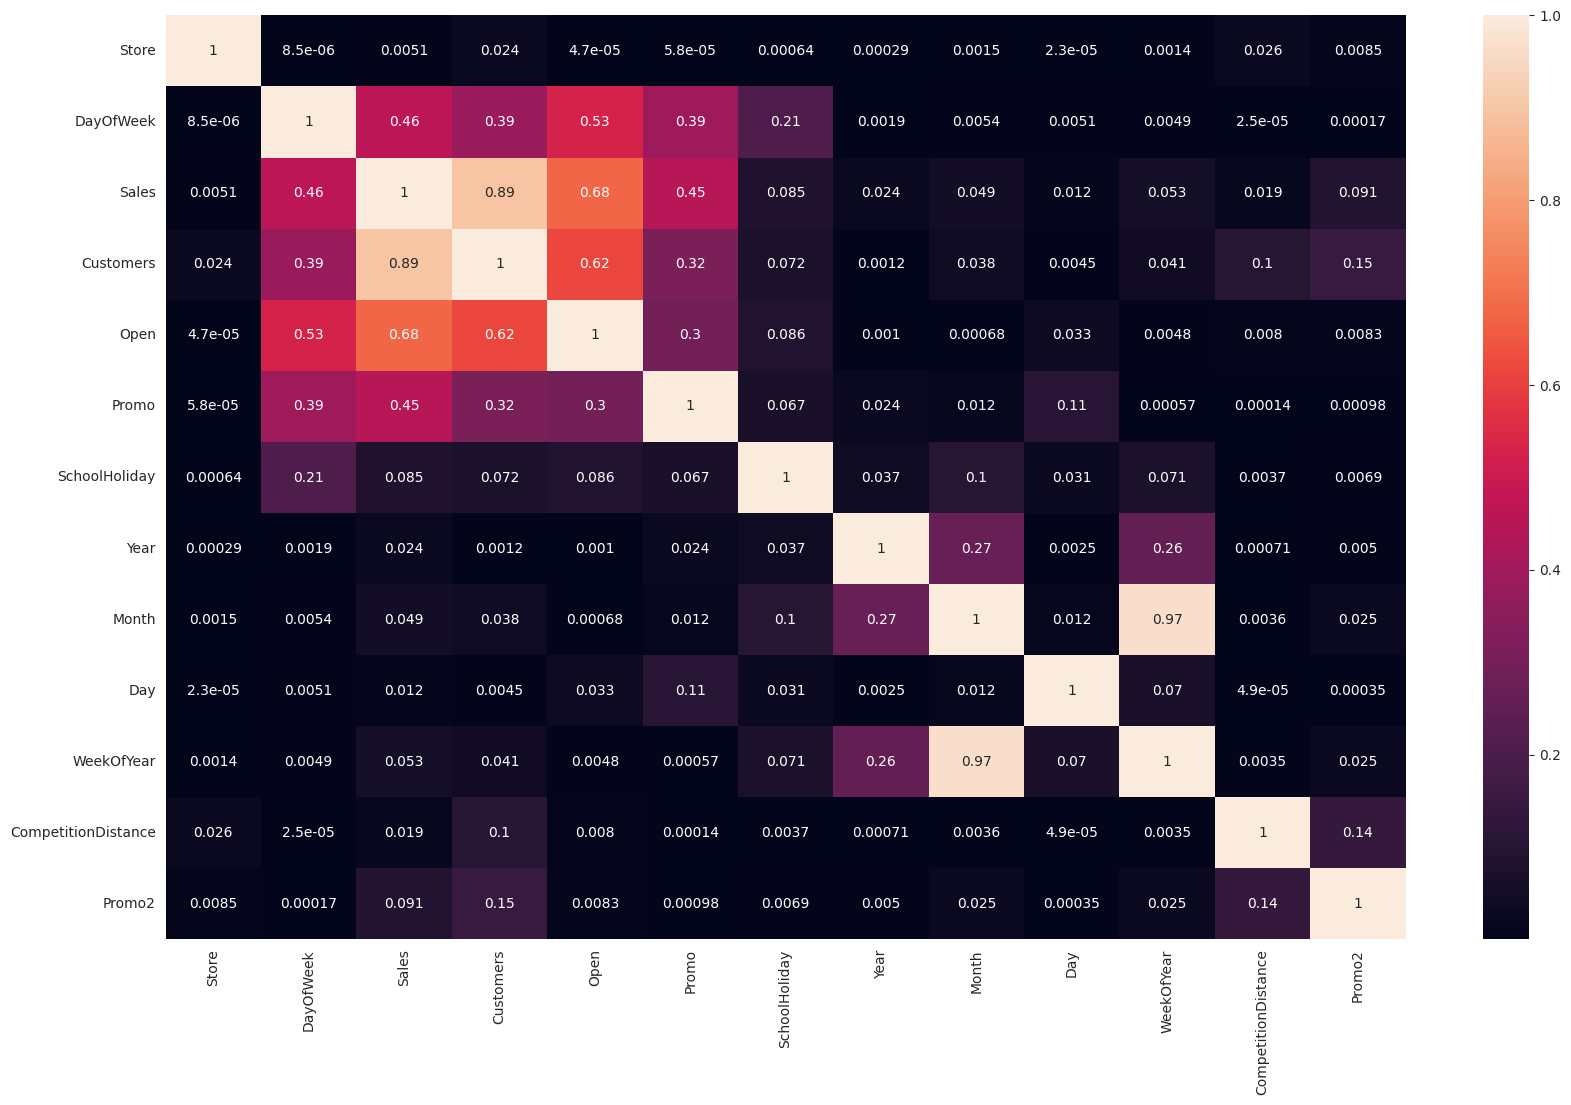

In [ ]:
plt.subplots(figsize=(20,12))
sns.heatmap(df.corr().abs(), annot=True)
plt.savefig("heatmap.png")

from google.colab import files
files.download('heatmap.png') # this line opens your documents in your pc to save your png

In [ ]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

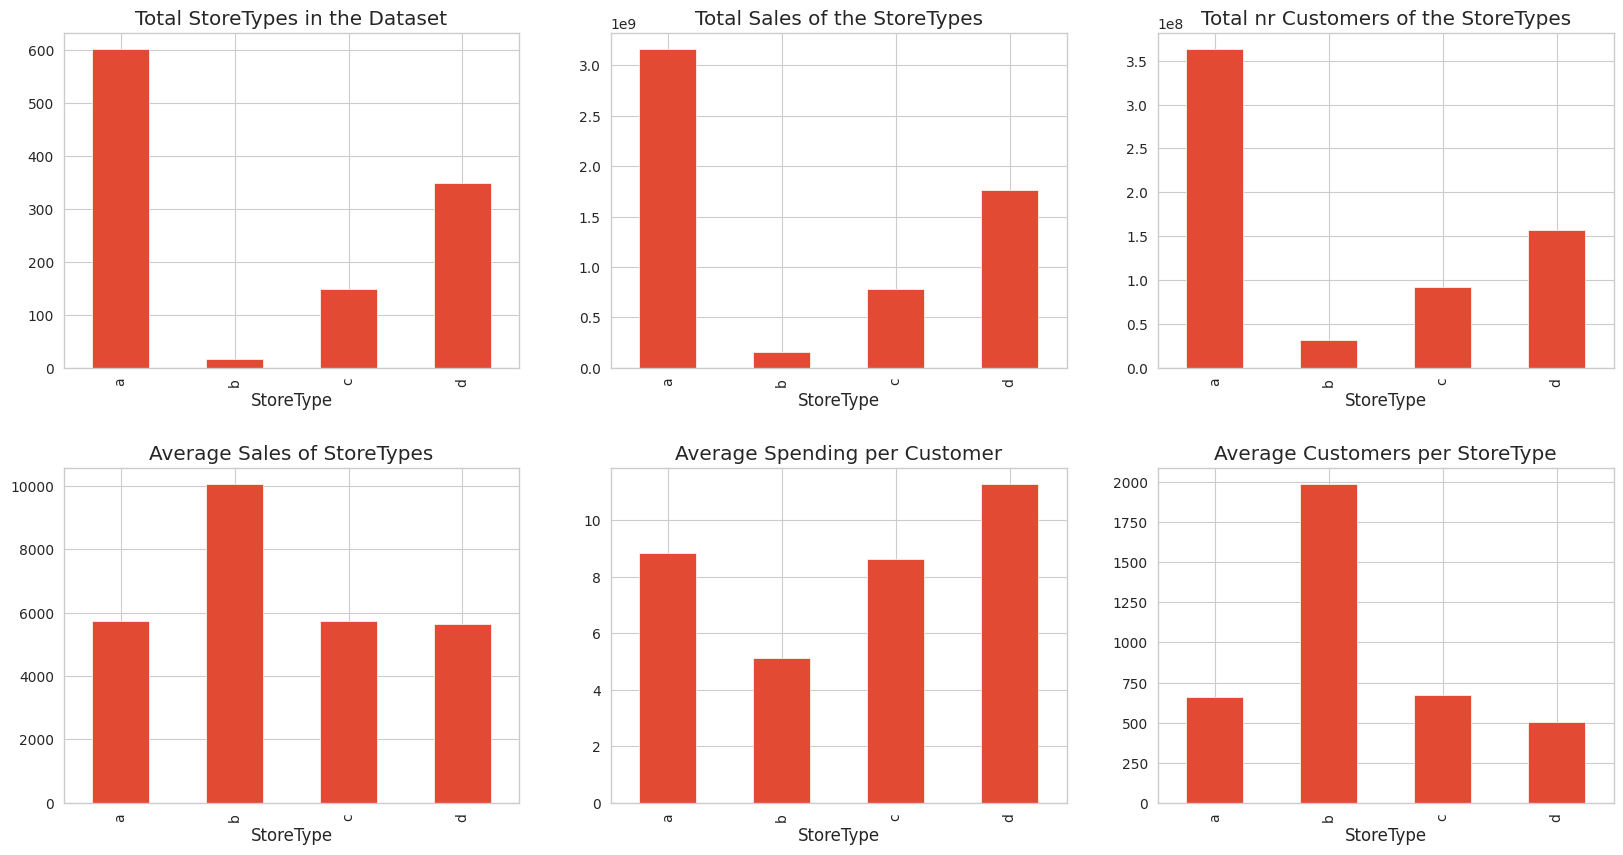

In [ ]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

What about the Competition Distance. What kind of inpact does this have on the sales.

In [ ]:
df.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)

<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

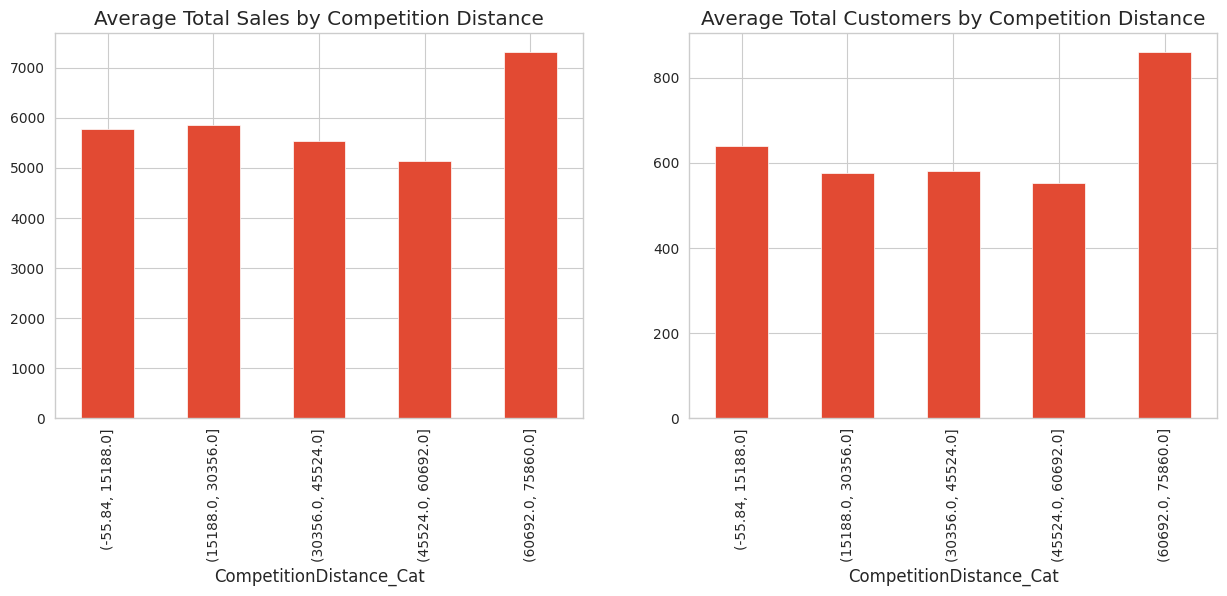

In [ ]:
f, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [ ]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

Box plot shows that we have a very high outliers in sales

<Axes: >

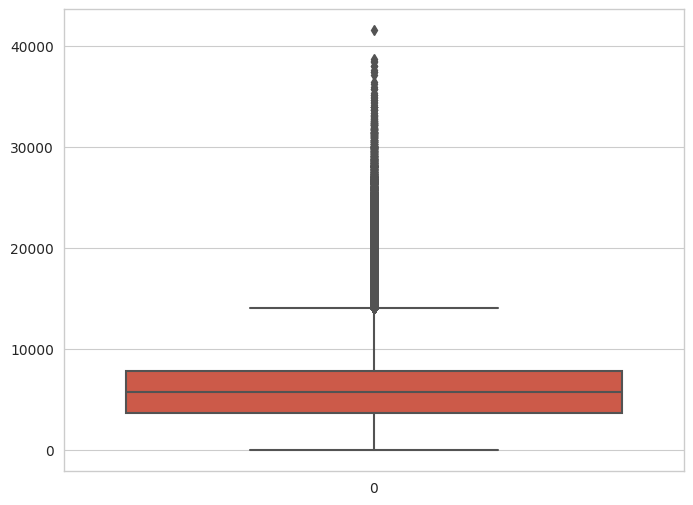

In [ ]:
#checking outliers in sales
sns.boxplot(rossman_df['Sales'])

Removing Outliers Of Sales Column

In [ ]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

#Conclusion of the analysis:
Sales are highly correlated to number of Customers.

The most selling and crowded store type is A.

StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.

StoreTybe D had the highest buyer cart.

Promo runs only in weekdays.

For all stores, Promotion leads to increase in Sales and Customers both.

More stores are opened during School holidays than State holidays.

The stores which are opened during School Holiday have more sales than normal days.

Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.

Promo2 doesnt seems to be correlated to any significant change in the sales amount.

Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null

# Drop Subsets Of Data Where Might Cause Bias

In [ ]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [ ]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [ ]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [ ]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [ ]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [ ]:
df_new=df.copy()

In [ ]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [ ]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,2015,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,1,2015,7,31,31,570.0,1,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,2015,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,2015,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,2015,7,31,31,29910.0,0,1,0,0,0,1,0,0


From plot it can be sen that most of the sales have been on 1st and last day of week

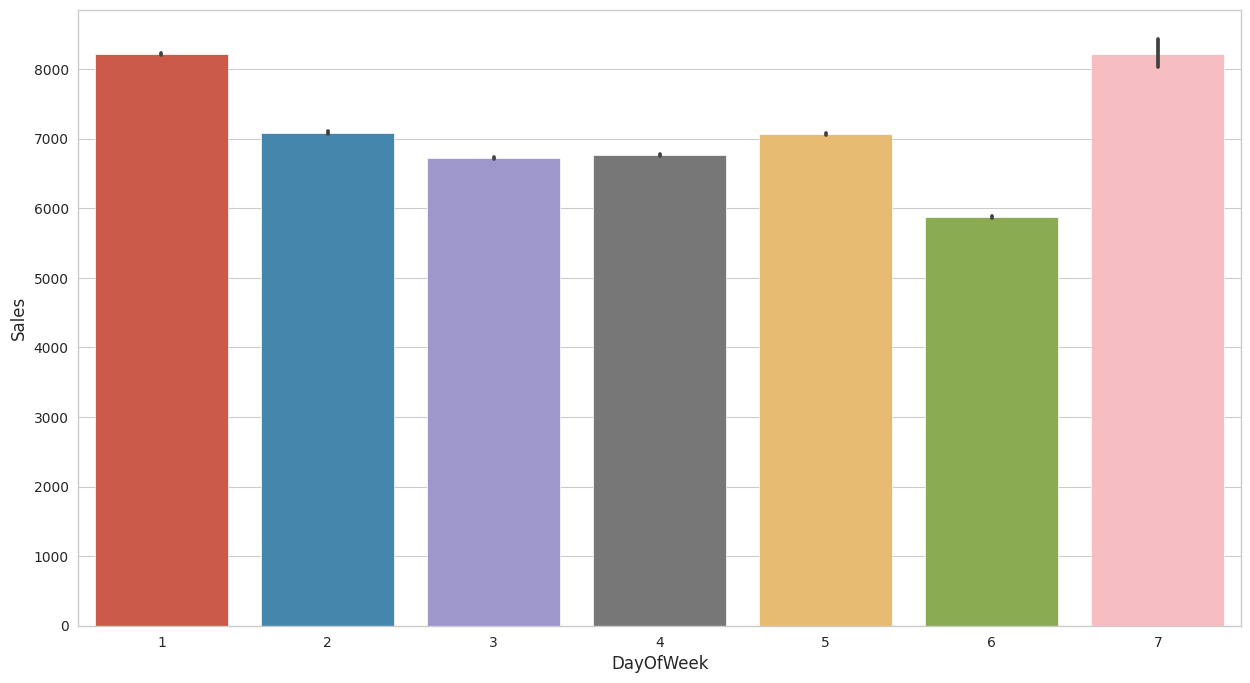

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new);


# Setting Features and Target Variables

In [ ]:
X = df_new.drop(['Sales','Store','Date','Year'] , axis = 1)
y= df_new.Sales

In [ ]:
X.shape

(844338, 16)

In [ ]:
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,5,625,1,1,7,31,31,570.0,1,1,0,0,0,1,0,0
2,5,821,1,1,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,5,1498,1,1,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,559,1,1,7,31,31,29910.0,0,1,0,0,0,1,0,0


In [ ]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

# Splitting Dataset Into Training Set and Test Set

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
columns=X_train.columns

#Implementing Supervised Machine Learning algorithms.
# 1. Linear Regression (OLS)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

1.294688075797209e+16

In [ ]:
regressor.coef_

array([-2.40656611e+02,  4.05340041e+04,  1.14583606e+03,  2.65391826e+01,
        3.64404456e+02,  5.80238055e+01, -1.04218154e+02,  1.93131210e+03,
        3.03431808e+02,  2.63960321e+14,  2.63960321e+14,  2.63960321e+14,
        2.63960321e+14, -1.32108411e+16, -1.32108411e+16, -1.32108411e+16])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

1708320.4162501679

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1307.0273203916465

In [ ]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.8237780657666707

In [ ]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.8225342022815003

In [ ]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

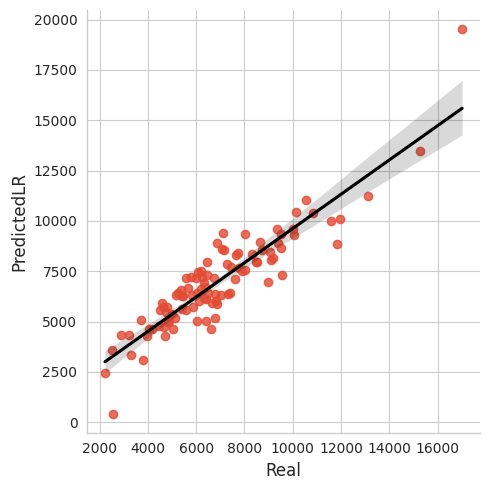

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

# Inferences On Linear Regression Coefficients

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                 2.812e+05
Date:                Thu, 28 Dec 2023   Prob (F-statistic):               0.00
Time:                        05:41:22   Log-Likelihood:            -7.2549e+06
No. Observations:              844338   AIC:                         1.451e+07
Df Residuals:                  844323   BIC:                         1.451e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1081.7391      5.795   -186.670      0.000   -1093.097   -1070.381
DayOfWeek             -40.2911      0.872    -46.224      0.000     -42.000     -38.583
Customers               7.3768      0.004   1716.238      0.000       7.368       7.385
Promo                1149.0920      3.076    373.627      0.000    1143.064    1155.120
SchoolHoliday          26.9278      3.689      7.299      0.000      19.697      34.159
Month                  32.7244      1.595     20.522      0.000      29.599      35.850
Day                     1.8878      0.168     11.218      0.000       1.558       2.218
WeekOfYear             -1.9953      0.367     -5.434      0.000      -2.715      -1.276
CompetitionDistance     0.0254      0.000    133.219      0.000       0.025       0.026
Promo2                303.0735      2.960    102.387      0.000     297.272     308.875
StoreType_a           284.6379      4.575     62.218      0.000     275.671     293.604
StoreType_b         -2929.1346     12.291   -238.317      0.000   -2953.224   -2905.045
StoreType_c           141.2258      5.241     26.945      0.000     130.953     151.499
StoreType_d          1421.5319      4.964    286.346      0.000    1411.802    1431.262
Assortment_a          913.8422      6.374    143.372      0.000     901.349     926.335
Assortment_b        -3217.6141     15.019   -214.241      0.000   -3247.050   -3188.178
Assortment_c         1222.0329      6.589    185.469      0.000    1209.119    1234.947
==============================================================================
Omnibus:                   197202.483   Durbin-Watson:                   1.708
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1734687.289
Skew:                           0.878   Prob(JB):                         0.00
Kurtosis:                       9.799   Cond. No.                     5.52e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.51e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# 2. LARS Lasso Regression

In [ ]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [ ]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8237675246463583 , Out of Sample Test Score : 0.8225417279566831
Training RMSE : 1303.197300480311 Testing RMSE : 1306.9996069745346
Training MAPE : 14.522935772030962 Testing MAPE : 14.559413856958889


# 3. Decision Tree Regression

In [ ]:
# #another script that takes toooo long, to find the right parameters for tree
# tree = DecisionTreeRegressor()

# params = {
#          'min_samples_split':[2,3,5,7],
#          'min_samples_leaf':[6,8,10],
#          }

# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)
# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.

# grid.fit(X_train, y_train)
# grid.best_params_

I trained Model with hyper parameters..to not run everytime i record the result

Here are our best parameters for Decision Tree

{ min_samples_split=5,min_samples_leaf=8 }

In [ ]:
tree = DecisionTreeRegressor(min_samples_leaf=8,min_samples_split=5)
treereg = tree.fit(X_train, y_train)

In [ ]:
train_score_4=treereg.score(X_train, y_train)
test_score_4=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_4 , "," ,
      "Test Score" ,":" , test_score_4)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9693421899947019 , Test Score : 0.9459496715426648
Training RMSE : 543.5478287190688 Testing RMSE : 721.3175543466854
Training MAPE : 5.117719218296932 Testing MAPE : 6.822727103876682


In [ ]:
#storing 100 observations for analysis
dc_pred = y_test_predicted[:100]
dc_real = y_test[:100]
dataset_dc = pd.DataFrame({'Real':dc_real,'PredictedDC':dc_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_dc['diff']=(dataset_dc['Real']-dataset_dc['PredictedDC']).abs()

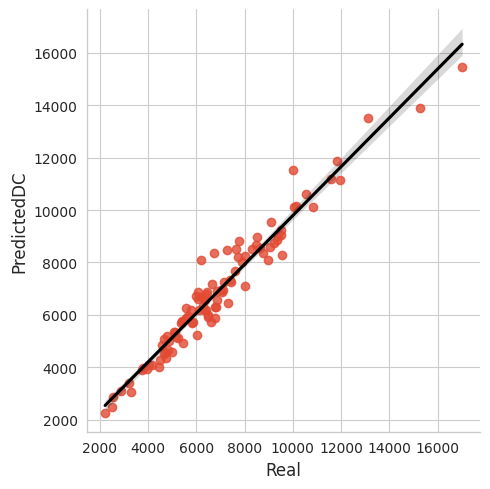

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedDC', data=dataset_dc, line_kws={'color': 'black'});

# 4. Support Vector Regression

In [ ]:
#%%time
#from sklearn.svm import SVR
#svr=SVR()
#svr_reg=svr.fit(X_train,y_train)
#svr

In [ ]:
#print("Regresion Model Score" , ":" , svr_reg.score(X_train, y_train) , "," ,
#      "Out of Sample Test Score" ,":" , svr_reg.score(X_test, y_test))

#y_predicted = svr_reg.predict(X_train)
#y_test_predicted = svr_reg.predict(X_test)

#print("Training RMSE", ":", rmse(y_train, y_predicted),
#      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
#print("Training MAPE", ":", mape(y_train, y_predicted),
#      "Testing MAPE", ":", mape(y_test, y_test_predicted))

# 5. K-Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_train, y_train)

In [ ]:
print("Regresion Model Score" , ":" , knnreg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(X_test, y_test))

y_predicted = knnreg.predict(X_train)
y_test_predicted = knnreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.7618743470834657 , Out of Sample Test Score : 0.7425811343524278
Training RMSE : 1514.8523079010813 Testing RMSE : 1574.1550932856537
Training MAPE : 17.215345661597066 Testing MAPE : 17.921388691999177


# 6. Random Forest With Hyper Parameter Tuning

In [ ]:
# #another script that takes toooo long, to find the right parameters for RFR
# rfr=RandomForestRegressor(n_jobs=-1)

# params = {
#          'n_estimators':[40,50,60,70,80,90],
#          'min_samples_split':[2,3,6,8],
#          'min_samples_leaf':[1,2,3,4],
#          'max_depth':[None,5,15,30]
#          }

# #the dimensionality is high, the number of combinations we have to search is enormous, using RandomizedSearchCV is a better option then GridSearchCV
# grid = RandomizedSearchCV(estimator=rfr,param_distributions=params,verbose=True,cv=10)

# #choosing 10 K-Folds makes sure i went through all of the data and didn't miss any pattern.
# grid.fit(X_train, y_train)
# grid.best_params_

### I trained Model with hyper parameters..to not run everytime i record the result

### Here are our best parameters for Random Forest

### { n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }

In [ ]:
#%%time
rdf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rdfreg = rdf.fit(X_train, y_train)

In [ ]:
train_score_5=rdfreg.score(X_train, y_train)
test_score_5=rdfreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_5 , "," ,
      "Test Score" ,":" , test_score_5)

y_predicted_2 = rdfreg.predict(X_train)
y_test_predicted_2 = rdfreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted_2),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted_2))
print("Training MAPE", ":", mape(y_train, y_predicted_2),
      "Testing MAPE", ":", mape(y_test, y_test_predicted_2))

In [ ]:
y_test_predicted_2

In [ ]:
#storing 100 observations for analysis
rf_prd = y_test_predicted_2[:100]
rf_real = y_test[:100]
dataset_rf = pd.DataFrame({'Real':rf_real,'PredictedRF':rf_prd})

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_rf['diff']=(dataset_rf['Real']-dataset_rf['PredictedRF']).abs()

In [ ]:
# taking 4 sample
dataset_rf.sample(4)

In [ ]:
#Statistical description of our predictions and actual values
dataset_rf.describe()

In [ ]:
#plotting the actual,predicted & difference of SALES
plt.style.use('seaborn')
dataset_rf.plot.hist(subplots=True, legend=False);

### As we can see that Actual, Prediction values are approximately closed to each other and there is no such significant variation in our plots.

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedRF', data=dataset_rf, line_kws={'color': 'red'}, size=6, aspect=1);

# Feature Importance On Random Forest Regressor

### As we can see that Random Forest has the highest test score

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
plot_feature_importance(rdfreg.feature_importances_,columns[:],'RANDOM FOREST')

# Conclusion

In [ ]:
score_df

Linear Regreesion  0.78    0.77

Lasso Regreesion   078     0.78

Decision Tree     0.98    0.99

Random forest Regreesion   0.99    0.95






Random Forest regressor achieved lowest MAPE as 5.65% showing that it is a highly accurate model. MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average